In [2]:
# import library
import tensorflow as tf
import matplotlib 
matplotlib.use('Agg')
%matplotlib inline
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from scipy.misc import imread
from imgaug import augmenters as iaa
import nibabel as nib
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation

plt.style.use('seaborn-white')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.random.seed(6278)
tf.set_random_seed(6728)
ia.seed(6278)

# Generate training data
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
# ========= choice of library ====

In [3]:
# get the fashion mnist data set
mnist = input_data.read_data_sets('../../Dataset/FashionMNIST/', one_hot=True)
x_data, train_label, y_data, test_label = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
x_data_added,x_data_added_label = mnist.validation.images,mnist.validation.labels
x_data = x_data.reshape(-1, 28, 28, 1)  # 28x28x1 input img
y_data = y_data.reshape(-1, 28, 28, 1)  # 28x28x1 input img
x_data_added = x_data_added.reshape(-1, 28, 28, 1)
x_data = np.vstack((x_data,x_data_added))
train_label = np.vstack((train_label,x_data_added_label))

train_batch = np.zeros((60000,28,28,1))
test_batch = np.zeros((10000,28,28,1))

for x in range(len(x_data)):
    train_batch[x,:,:,:] = np.expand_dims(resize(x_data[x,:,:,0],(28,28)),axis=3)
for x in range(len(y_data)):
    test_batch[x,:,:,:] = np.expand_dims(resize(y_data[x,:,:,0],(28,28)),axis=3)

# print out the data shape and the max and min value
print(train_batch.shape)
print(train_batch.max())
print(train_batch.min())
print(train_label.shape)
print(train_label.max())
print(train_label.min())
print(test_batch.shape)
print(test_batch.max())
print(test_batch.min())
print(test_label.shape)
print(test_label.max())
print(test_label.min())

Extracting ../../Dataset/FashionMNIST/train-images-idx3-ubyte.gz
Extracting ../../Dataset/FashionMNIST/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/FashionMNIST/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/FashionMNIST/t10k-labels-idx1-ubyte.gz


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


(60000, 28, 28, 1)
1.0
0.0
(60000, 10)
1.0
0.0
(10000, 28, 28, 1)
1.0
0.0
(10000, 10)
1.0
0.0


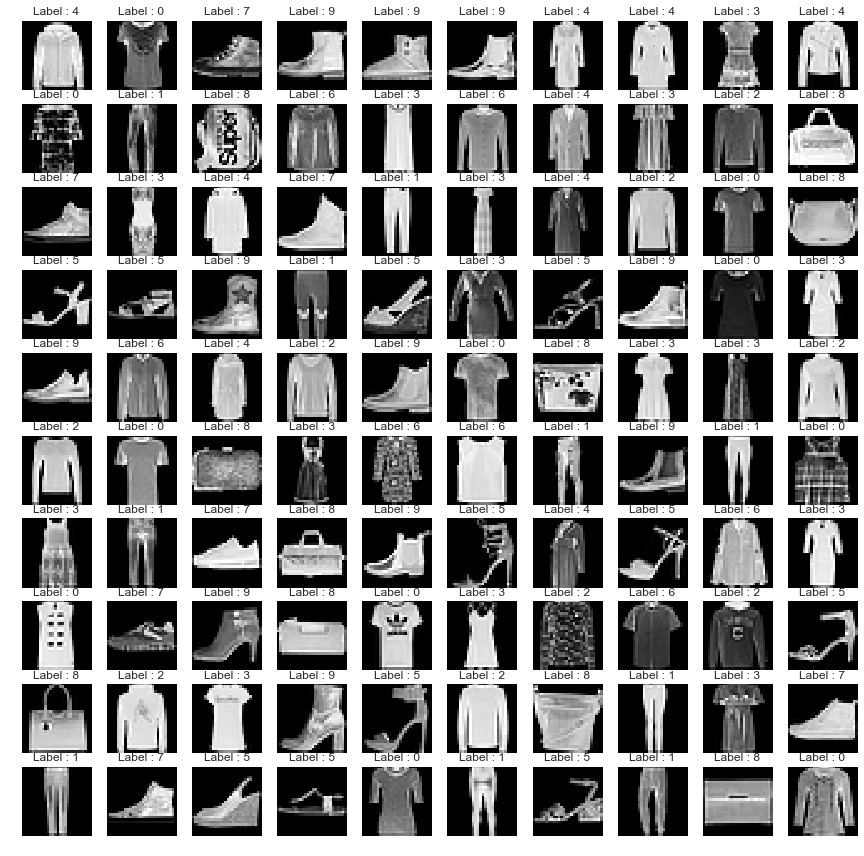

In [4]:
# show small amount of fashion
fig=plt.figure(figsize=(15, 15))
columns = 10 ; rows = 10
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(train_batch[i-1]),cmap='gray')
    plt.axis('off')
    plt.title("Label : "+str(np.argmax(train_label[i-1])))
plt.show()

In [28]:
# reduction in different direction
from sklearn.decomposition import PCA,KernelPCA,FastICA
sk_pca,sk_kpca,sk_ica = PCA(20*20),KernelPCA(20*20),FastICA(20*20)
train_batch_2 = train_batch[:1000]

sk_pca_data = sk_pca.fit_transform(train_batch_2.reshape(1000,-1))
sk_kpca_data = sk_kpca.fit_transform(train_batch_2.reshape(1000,-1))
sk_ica_data = sk_ica.fit_transform(train_batch_2.reshape(1000,-1))

(1000, 400)
(1000, 400)
(1000, 400)


<IPython.core.display.Javascript object>


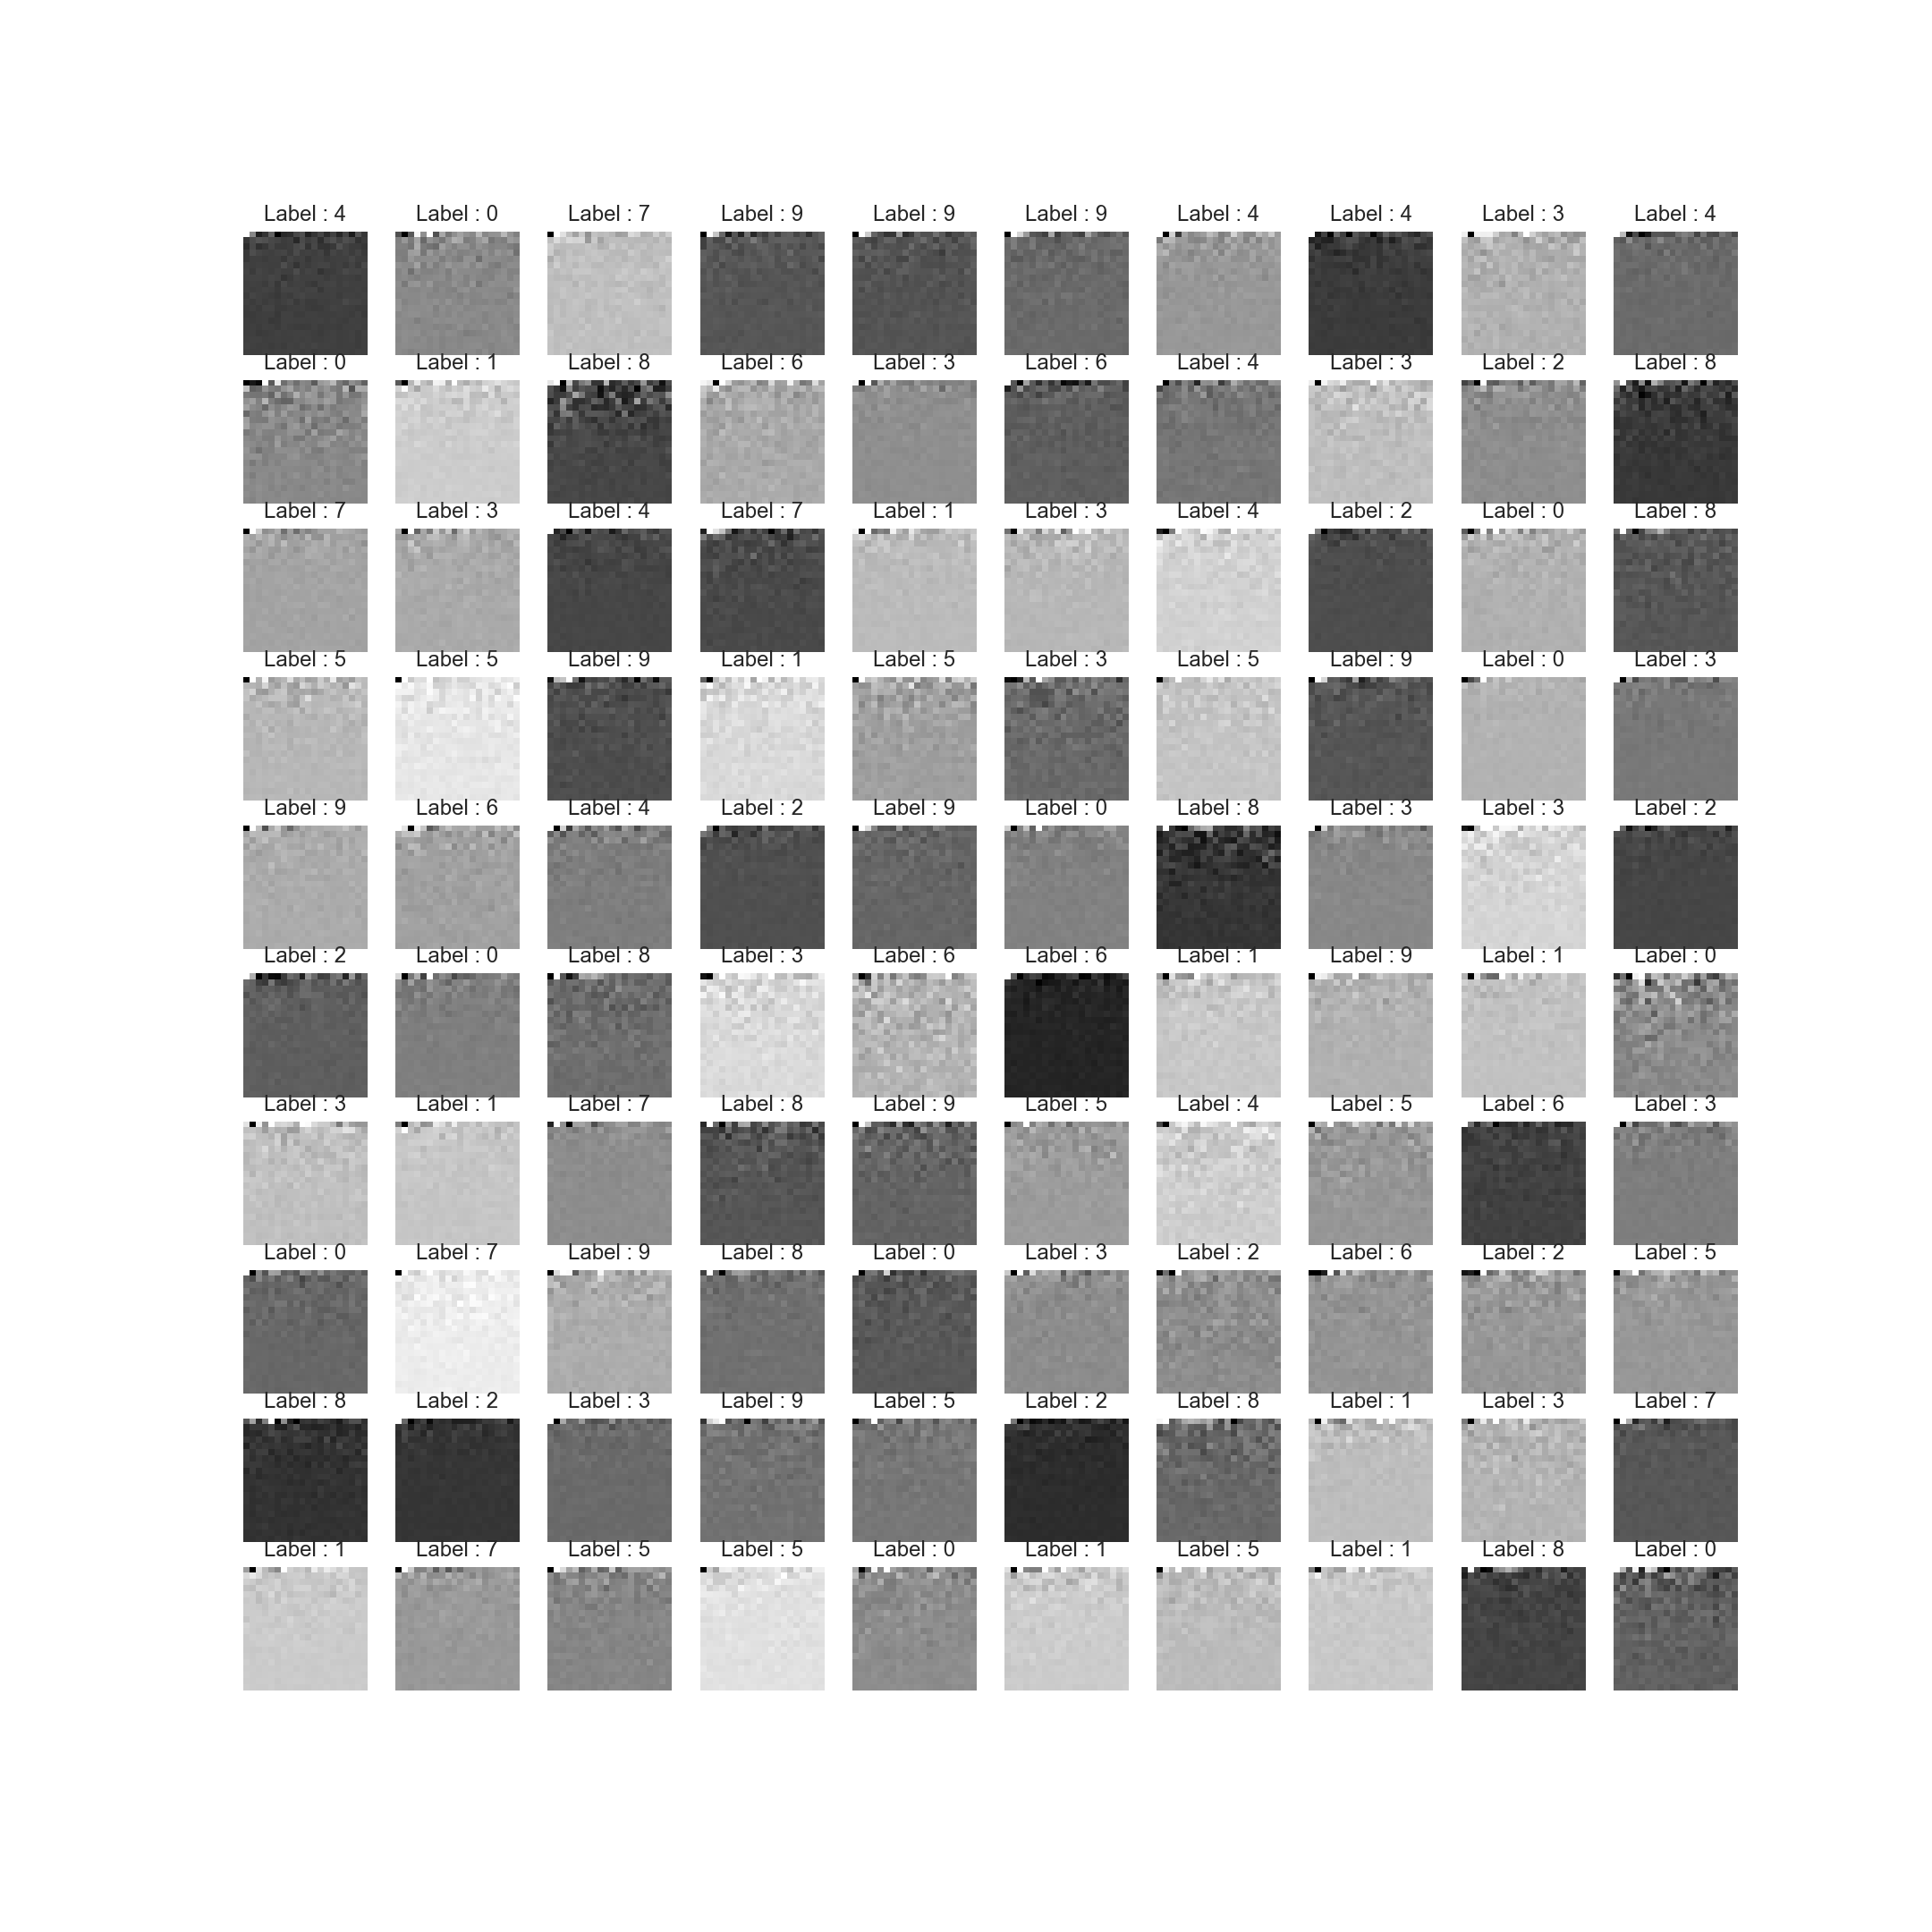

<IPython.core.display.Javascript object>


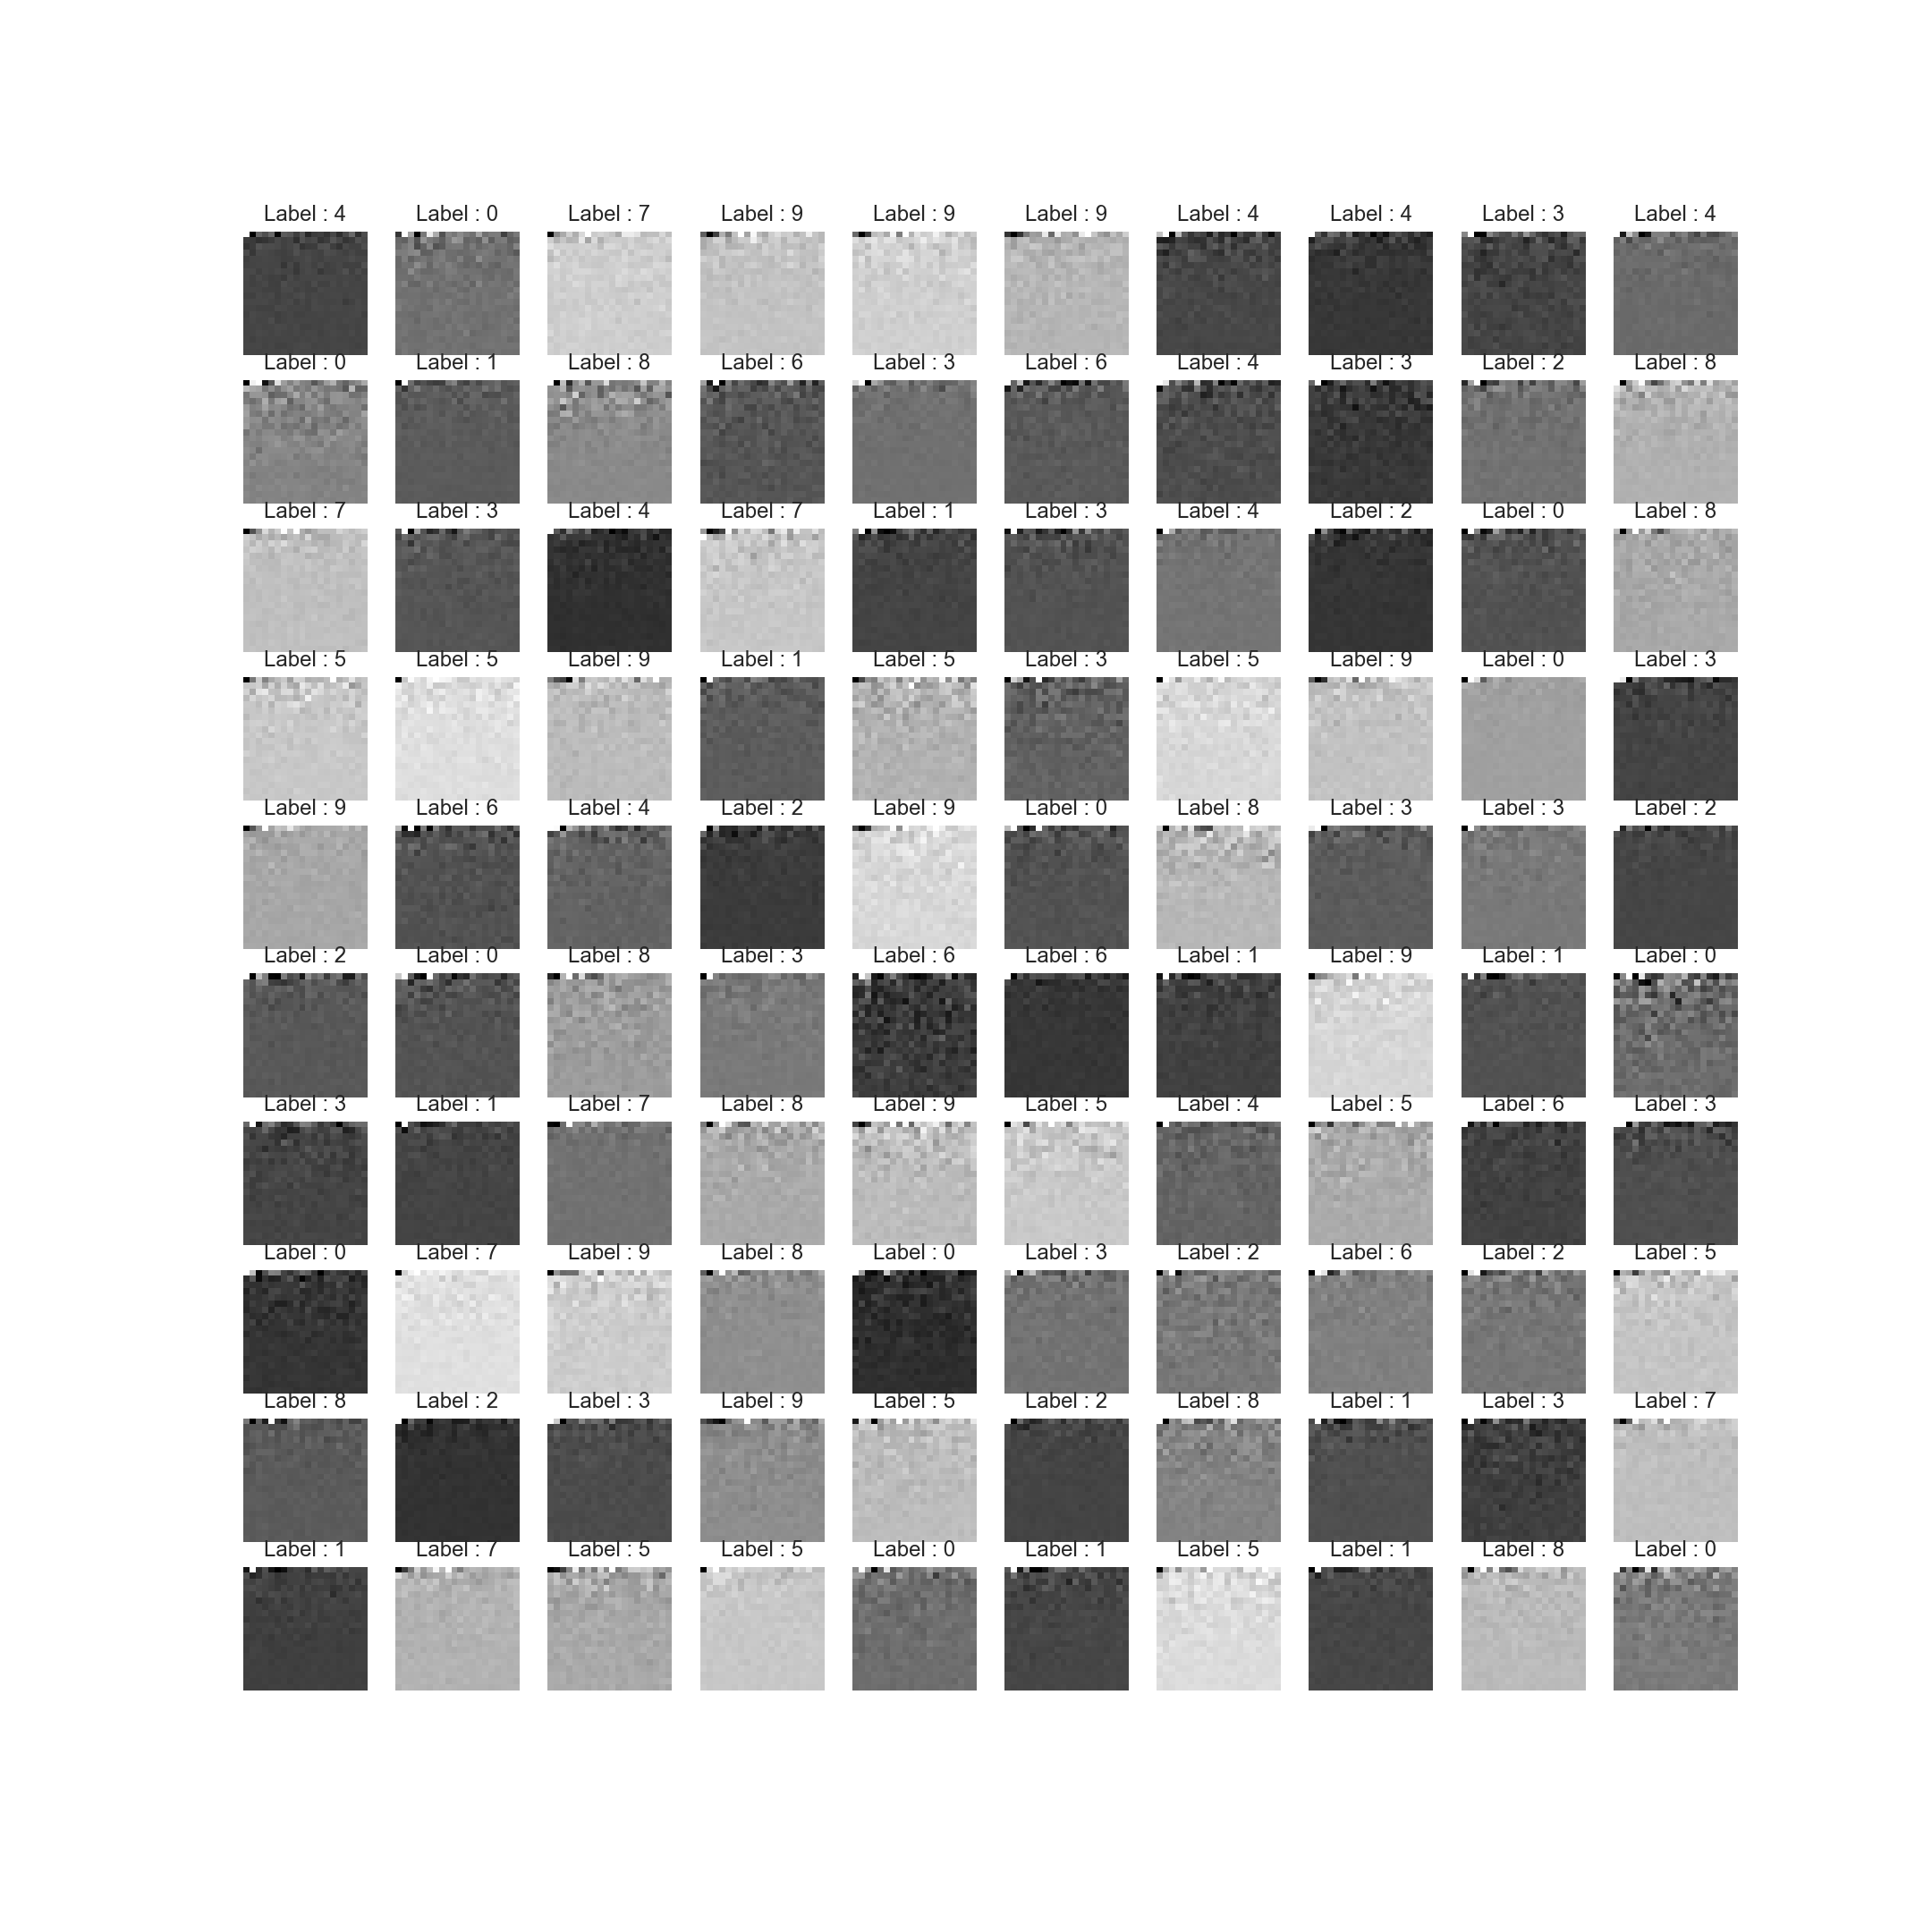

<IPython.core.display.Javascript object>


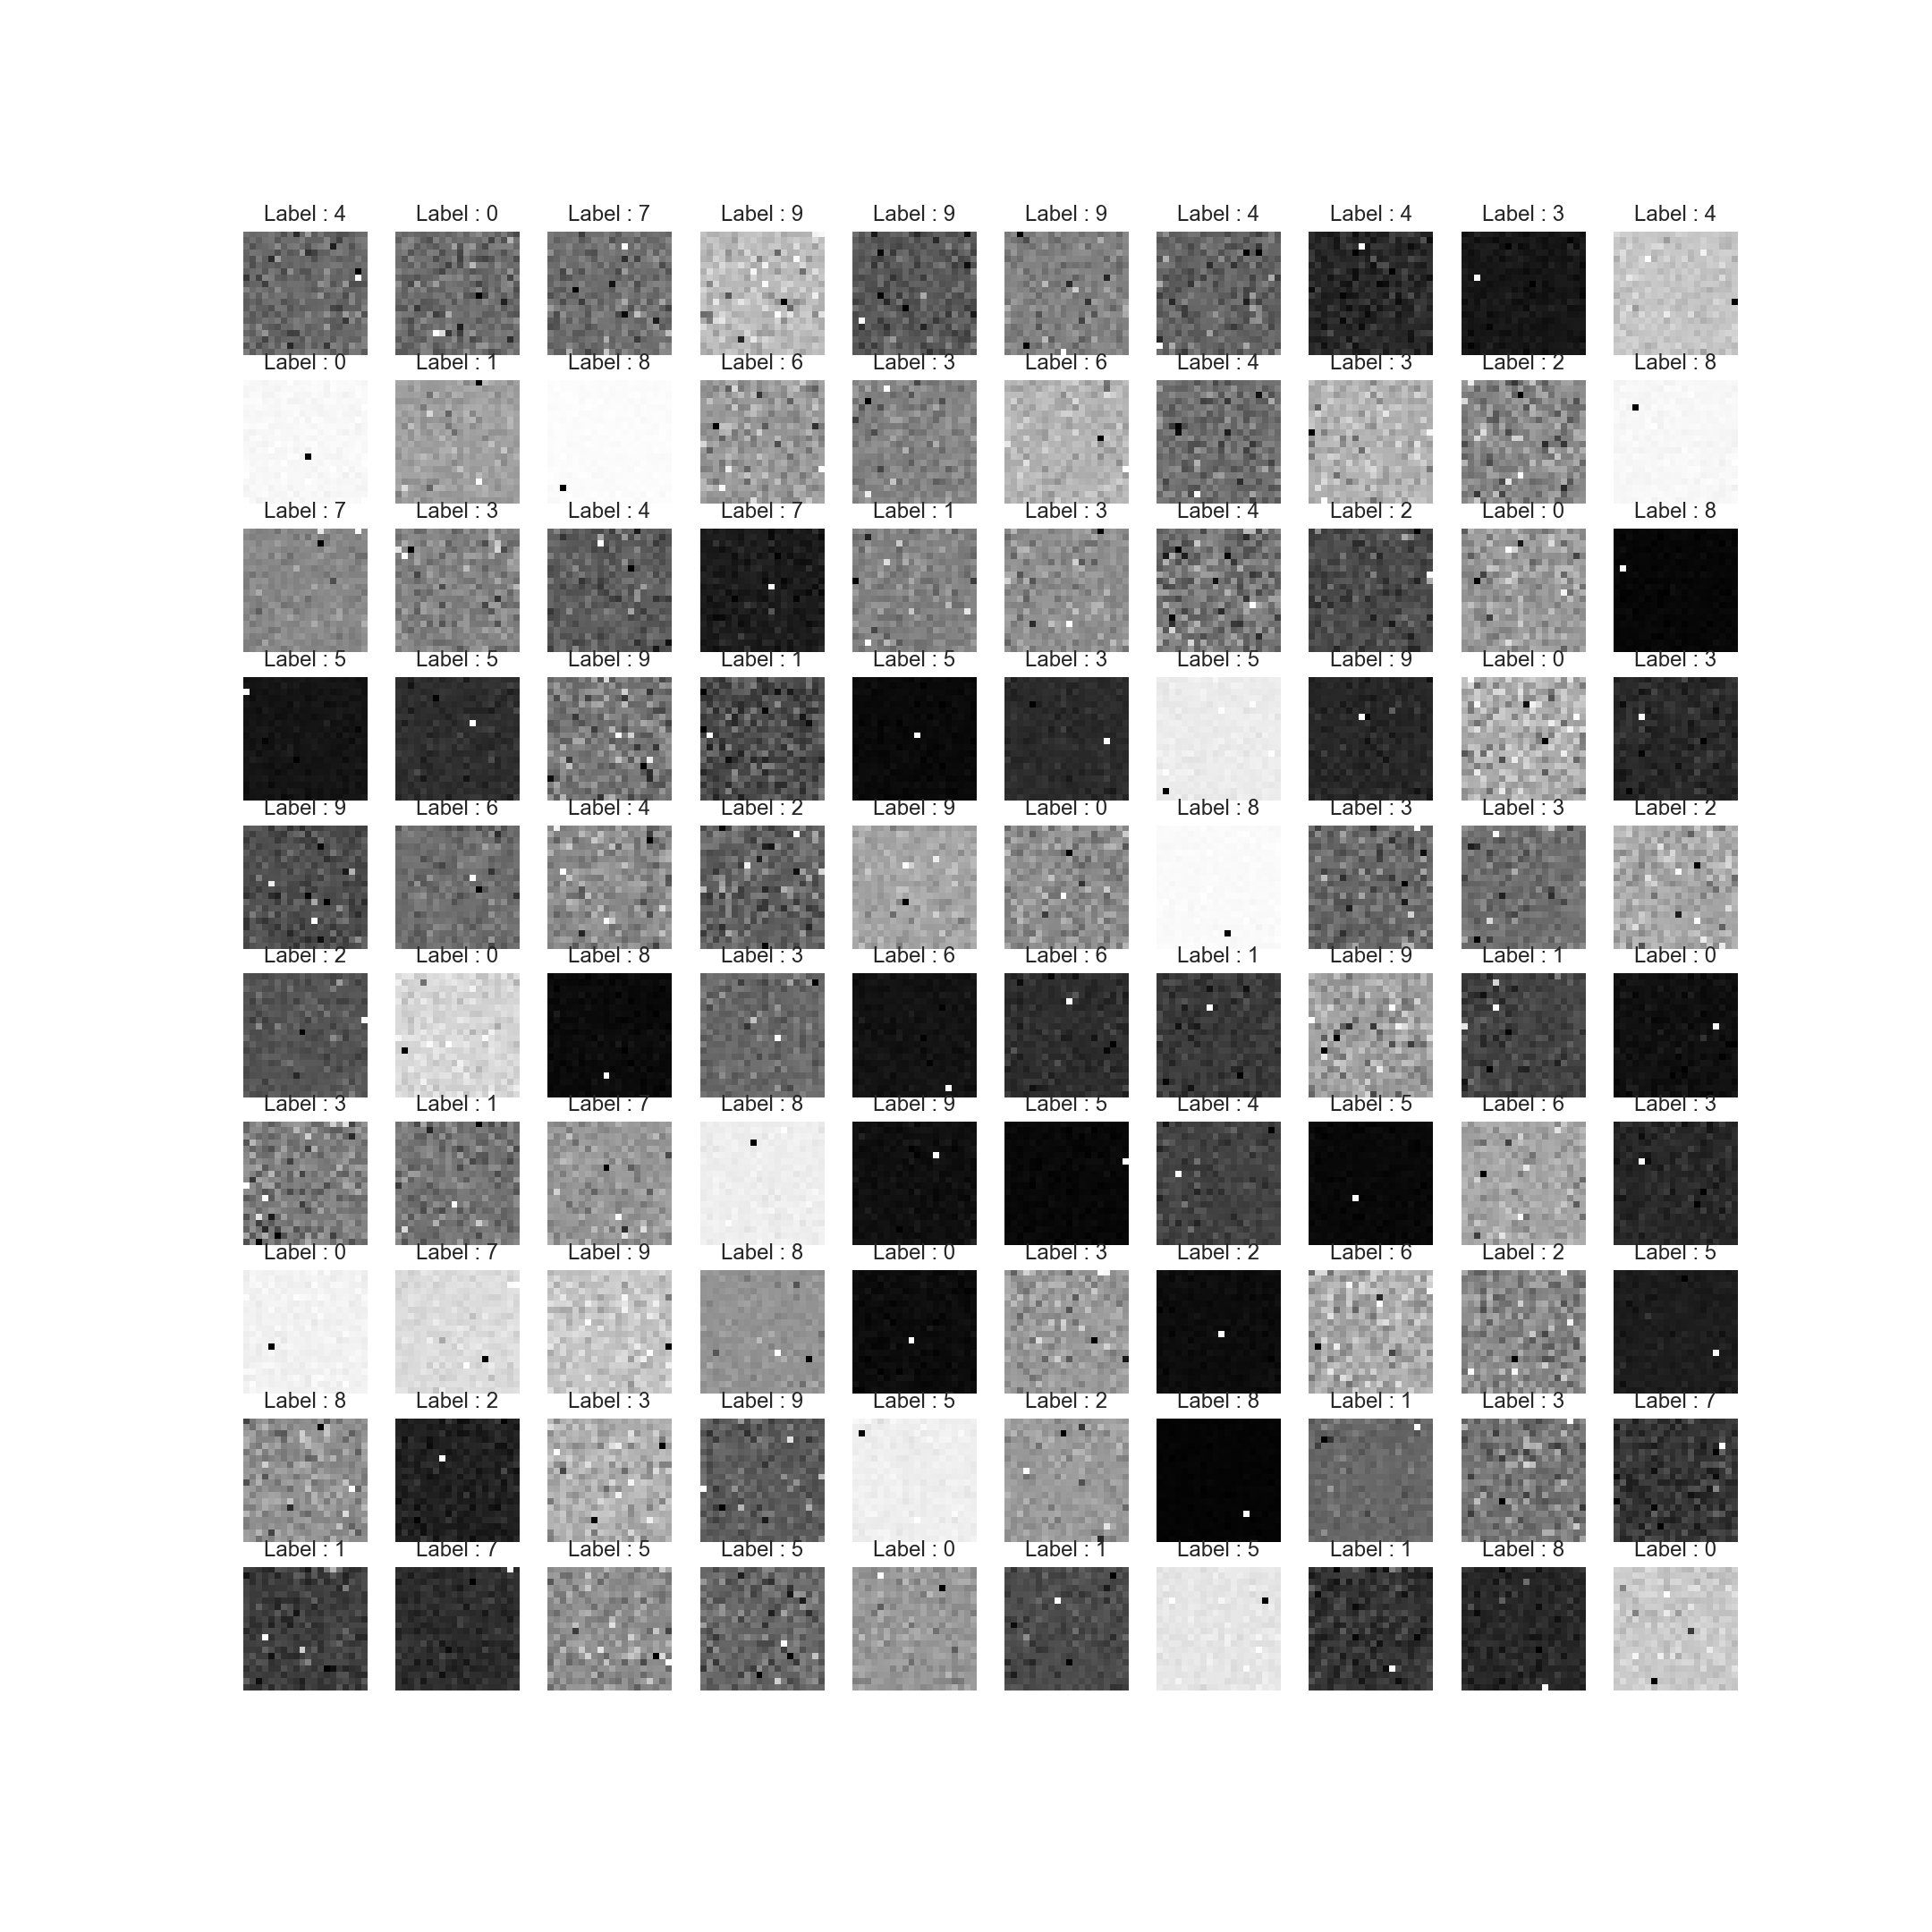

In [29]:
# view 
print(sk_pca_data.shape)
print(sk_kpca_data.shape)
print(sk_ica_data.shape)



fig=plt.figure(figsize=(10, 10))
columns = 10 ; rows = 10
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(sk_pca_data[i-1].reshape(20,20)),cmap='gray')
    plt.axis('off')
    plt.title("Label : "+str(np.argmax(train_label[i-1])))
plt.show()

fig=plt.figure(figsize=(10, 10))
columns = 10 ; rows = 10
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(sk_kpca_data[i-1].reshape(20,20)),cmap='gray')
    plt.axis('off')
    plt.title("Label : "+str(np.argmax(train_label[i-1])))
plt.show()

fig=plt.figure(figsize=(15, 15))
columns = 10 ; rows = 10
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(sk_ica_data[i-1].reshape(20,20)),cmap='gray')
    plt.axis('off')
    plt.title("Label : "+str(np.argmax(train_label[i-1])))
plt.show()

<IPython.core.display.Javascript object>


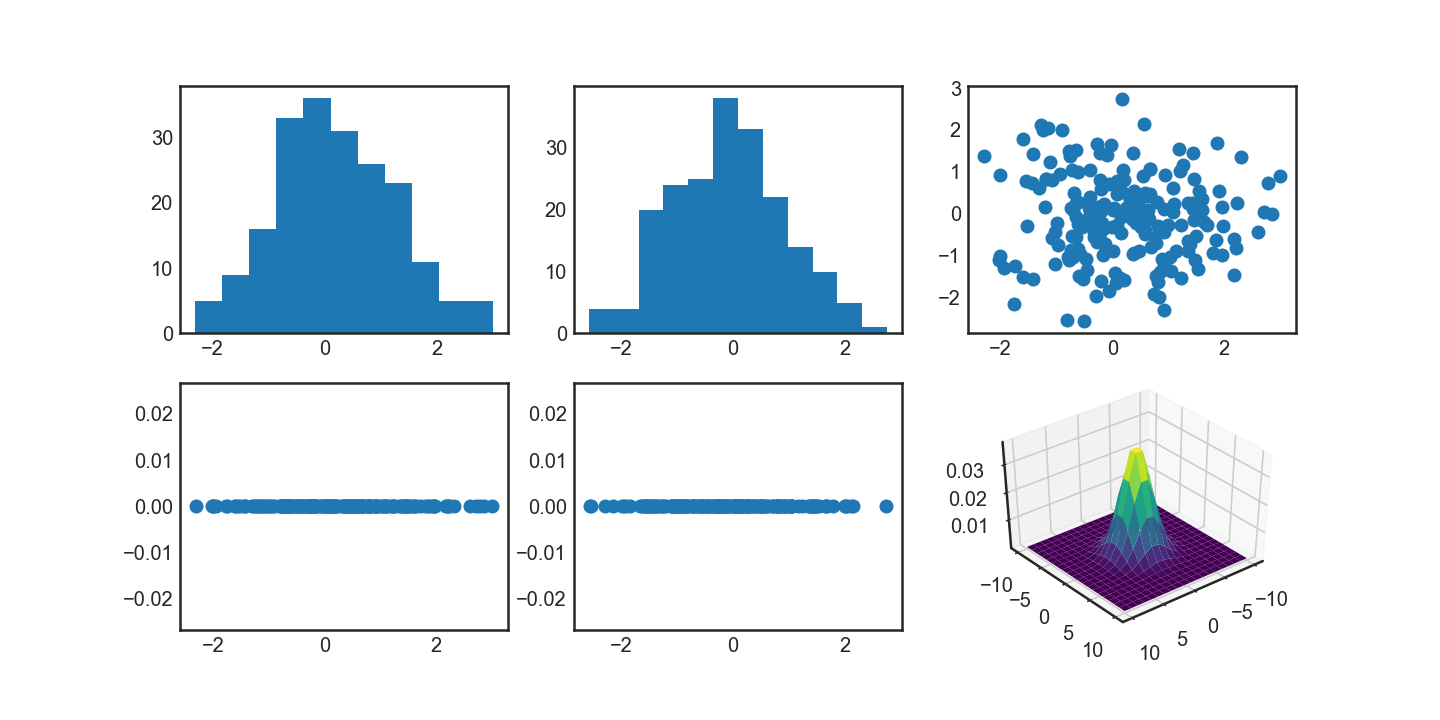

(20,)
(20,)
(20, 20)
(20, 20)


In [24]:
# numpy dsitribution testing
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib notebook
first_data_test = np.random.randn(200, 2) 
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.hist(first_data_test[:,0],bins='auto')
plt.subplot(232)
plt.hist(first_data_test[:,1],bins='auto')
plt.subplot(233)
plt.scatter(first_data_test[:,0],first_data_test[:,1])
plt.subplot(234)
plt.scatter(first_data_test[:,0],np.zeros(200)) 
plt.subplot(235)
plt.scatter(first_data_test[:,1],np.zeros(200)) 

size = 20
sigma_x = 2.
sigma_y = 2.

x = np.linspace(-10, 10, size)
y = np.linspace(-10, 10, size)
print(x.shape)
print(y.shape)

temp = np.random.rand(20,20)
print(temp.shape)

x, y = np.meshgrid(x, y)
z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
     + y**2/(2*sigma_y**2))))
print(z.shape)
ax = plt.subplot(236,projection='3d')
# ax.scatter3D(x,y,temp,cmap='viridis', edgecolor='none')
ax.plot_surface(x,y,z,cmap='viridis', edgecolor='none')


plt.show()

<IPython.core.display.Javascript object>


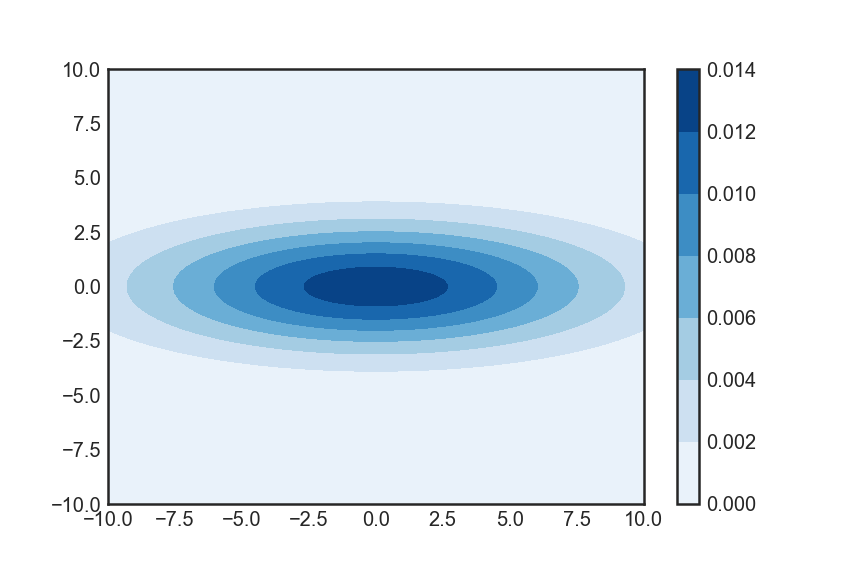

In [12]:
size = 100
sigma_x = 6.
sigma_y = 2.

x = np.linspace(-10, 10, size)
y = np.linspace(-10, 10, size)

x, y = np.meshgrid(x, y)
z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
     + y**2/(2*sigma_y**2))))

plt.contourf(x, y, z, cmap='Blues')
plt.colorbar()
plt.show()

In [1]:
! git add .
! git commit -m "from mac"
! git push

[master 185ce2b0] from mac
 2 files changed, 12 insertions(+)
 create mode 100644 NeuralNetwork/AAE/.ipynb_checkpoints/z some experiments -checkpoint.ipynb
 create mode 100644 NeuralNetwork/AAE/z some experiments .ipynb
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 519 bytes | 519.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   83f23acb..185ce2b0  master -> master
